# 第二讲：Meta分析中的异质性（heterogeneity）分析
___

## 1. 随机效应模型（Random effects model, REM）

固定效应模型认为多个研究存在一致的效应值，差异的产生主要是由于采样误差所致。但这个假设往往不能成立，因此，DerSimonian-Laird (1986)和 Fleiss (1993)又提出了随机效应模型（random effects model, REM）：
$$
\hat{\theta}_k \overset{i.i.d}{\sim} \mathcal{N}(\theta_k, \hat{\sigma}_k^2)
$$
其中
- $\hat{\theta}_k$： 研究$k$的效应观察值；
- $\theta_k$：研究$k$的真实效应值；
- $\hat{\sigma}_k^2$：研究$k$的标准误差。

随机效应模型认为$\theta_k$不是固定的，其符合高斯分布：
$$
\theta_k \overset{i.i.d}{\sim} \mathcal{N}(\theta, \tau^2)
$$

也可将其写成另一种形式：
$$
\hat{\theta}_k = \theta + \sqrt{\hat{\sigma}_k^2 + \tau^2} \epsilon_k, 其中\epsilon_k \overset{i.i.d}{\sim} \mathcal{N}(0,1)
$$
这个模型的方差就被分解为两部分，其中$\hat{\sigma}_k^2$是研究内部由于采样误差导致的方差，而$\tau^2$则由于研究间存在的异质性（heterogeneity）所产生的方差。

不论是固定效应模型还是随机效应模型，在计算汇总效应值的时候，都采用其加权平均值进行估计。而且两者都可以采用Inverse-variance计算权值，但是随机效应模型计算权值的时候，必须加上异质性方差$\tau^2$，也就是：
$$
w_k = \frac{1}{\hat{\sigma}_k^2 + \tau^2}
$$

Loading 'meta' package (version 4.4-1).


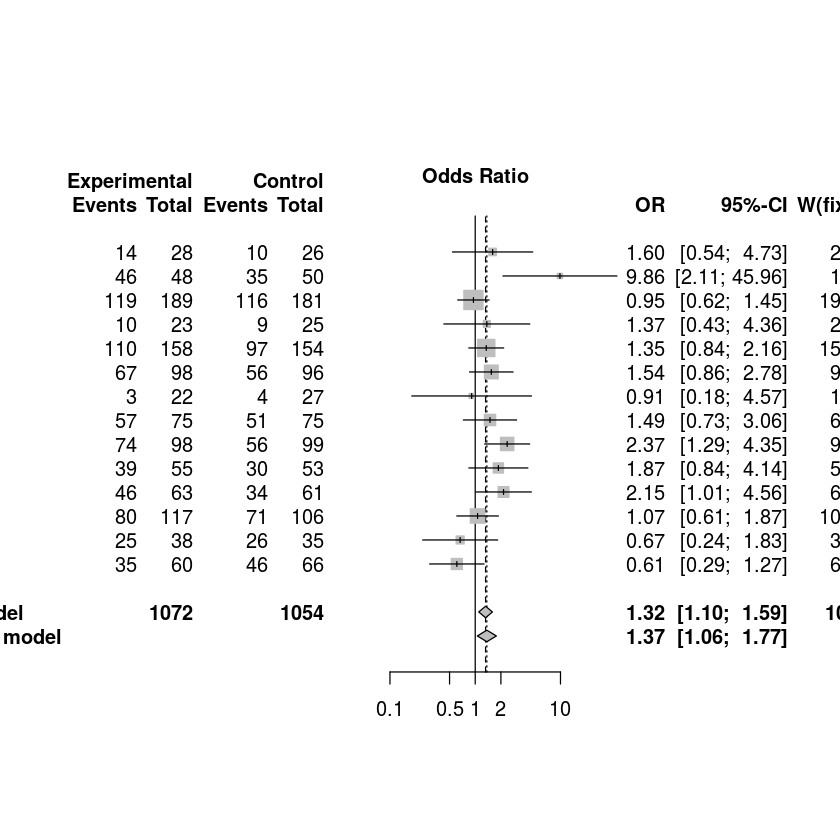

In [1]:
library(meta)
cr <- read.csv("data/hd-cr.csv", as.is=TRUE)
meta1 <- metabin(crHDCT, nHDCT, crControl, nControl, 
                 sm="OR", data=cr, studlab=study,
                 comb.random=FALSE, method="Inverse")
forest(meta1, comb.random=TRUE, hetstat=FALSE)

相比FEM，REM的结论会更加保守一些，结果的95%置信区间也会更宽一些。相对而言，我们更加相信REM的结论，倾向于在工作中更多使用REM。当然，其Power相比FEM要低一些。

In [3]:
?metabin

metabin {meta},R Documentation
event.e,Number of events in experimental group.
n.e,Number of observations in experimental group.
event.c,Number of events in control group.
n.c,Number of observations in control group.
studlab,An optional vector with study labels.
data,"An optional data frame containing the study information, i.e., event.e, n.e, event.c, and n.c."
subset,An optional vector specifying a subset of studies to be used.
method,"A character string indicating which method is to be used for pooling of studies. One of ""Inverse"", ""MH"", ""Peto"", or ""GLMM"", can be abbreviated."
sm,"A character string indicating which summary measure (""RR"", ""OR"", ""RD"", or ""ASD"") is to be used for pooling of studies, see Details."
incr,"Could be either a numerical value which is added to each cell frequency for studies with a zero cell count or the character string ""TACC"" which stands for treatment arm continuity correction, see Details."


In [4]:
meta2 <- metabin(crHDCT, nHDCT, crControl, nControl, 
                 sm="OR", data=cr, studlab=study,
                 comb.random=TRUE, method="peto")
summary(meta2)

Number of studies combined: k = 14

                         OR           95%-CI    z  p-value
Fixed effect model   1.3462 [1.1233; 1.6134] 3.22   0.0013
Random effects model 1.3931 [1.0760; 1.8038] 2.52   0.0119

Quantifying heterogeneity:
tau^2 = 0.0992; H = 1.34 [1.00; 1.84]; I^2 = 44.5% [0.0%; 70.3%]

Test of heterogeneity:
     Q d.f.  p-value
 23.42   13   0.0369

Details on meta-analytical method:
- Peto method
- DerSimonian-Laird estimator for tau^2

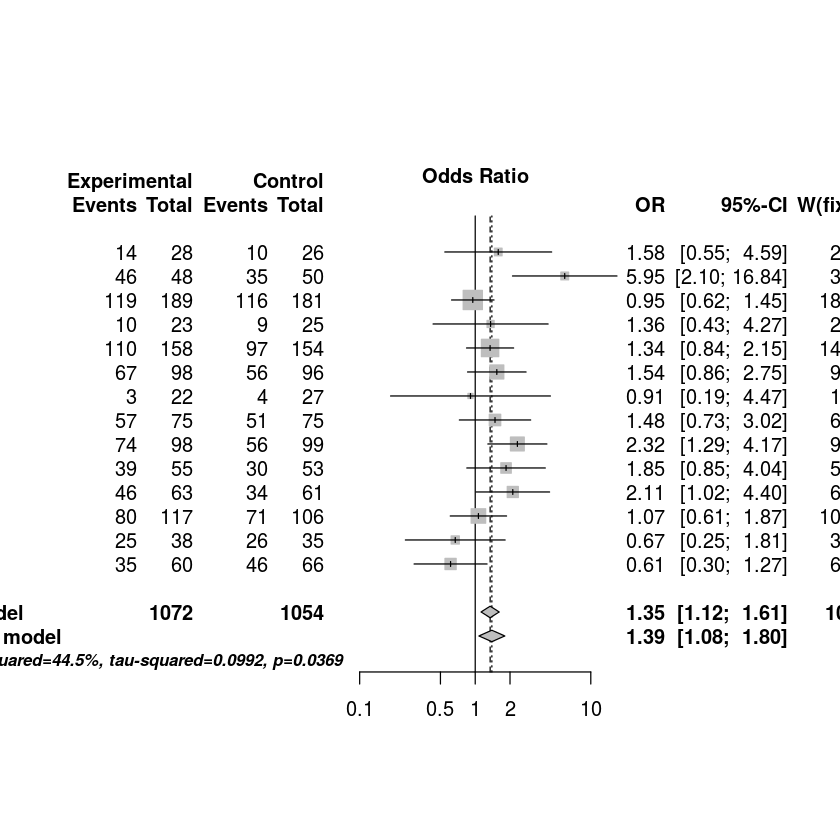

In [5]:
forest(meta2)

In [12]:
names(meta2)

[1] "event.e"       "n.e"           "event.c"       "n.c"          
 [5] "method"        "incr"          "sparse"        "allincr"      
 [9] "addincr"       "allstudies"    "doublezeros"   "MH.exact"     
[13] "RR.cochrane"   "Q.CMH"         "print.CMH"     "incr.e"       
[17] "incr.c"        "studlab"       "TE"            "seTE"         
[21] "lower"         "upper"         "zval"          "pval"         
[25] "w.fixed"       "w.random"      "TE.fixed"      "seTE.fixed"   
[29] "lower.fixed"   "upper.fixed"   "zval.fixed"    "pval.fixed"   
[33] "TE.random"     "seTE.random"   "lower.random"  "upper.random" 
[37] "zval.random"   "pval.random"   "seTE.predict"  "lower.predict"
[41] "upper.predict" "level.predict" "k"             "Q"            
[45] "df.Q"          "tau"           "se.tau2"       "C"            
[49] "H"             "lower.H"       "upper.H"       "I2"           
[53] "lower.I2"      "upper.I2"      "sm"            "level"        
[57] "level.comb"    "comb.fixed"    "comb.random"   "hakn"         
[61] "df.hakn"       "method.tau"    "tau.preset"    "tau.common"   
[65] "prediction"    "method.bias"   "title"         "complab"      
[69] "outclab"       "label.e"       "label.c"       "label.left"   
[73] "label.right"   "data"          "subset"        "print.byvar"  
[77] "warn"          "call"          "backtransf"    "version"

In [17]:
1-pchisq(meta2$Q, df=meta2$df.Q)

[1] 0.03689239

In [28]:
meta2$method.tau

[1] "DL"

虽然随机效应模型考虑了异质性，但并未解释异质性的来源，我们可通过随机效应进行建模来分析。常用的方法有亚组分析（subgroup analysis）和Meta回归分析。

## 2. 亚组分析（Subgroup analysis）

亚组分析是按照某个或者几个分类变量将研究分为多个亚组进行分析。如果组间的方差要远远大于组内的方差，则我们认为这个分类变量很可能就是异质性的主要来源。例如，有些研究可能针对的是高风险人群，而有些研究研究的是低风险人群；某些研究的质量较差，而有些研究质量较好。

亚组分析的过程有点类似ANOVA（Analysis of variance）：

- 假设存在$p$个亚组，第$s=1,\ldots,p$个亚组的研究数为$K_s$
- 对亚组$s$计算其加权平均值$\hat{theta}_s$：
$$
\hat{\theta}_s = \frac{\sum_{k=1}^{K_s} w_{sk}\hat{\theta}_{sk}}{\sum_{k=1}^{K_s} w_{sk}}
$$
- 不分组的加权平均值$\hat{\theta}$为：
$$
\hat{\theta} = \frac{\sum_{k=1}^{K} w_{k}\hat{\theta}_{k}}{\sum_{k=1}^{K} w_{k}} = \frac{\sum_{s=1}^p \sum_{k=1}^{K_s} w_{sk}\hat{\theta}_{sk}}{\sum_{s=1}^p \sum_{k=1}^{K_s} w_{sk}}
$$
- 对分组$s$的权重总和$w_s$为：
$$
w_s = \sum_{k=1}^{K_s} w_sk
$$

### 2.1 组间（Between-group）异质性统计分析

组间异质性统计值可通过以下公式计算得到：
$$
\mathbf{Q}_B = \sum_{s=1}^p w_s (\hat{\theta}_s - \hat{\theta})^2 \sim \chi^2_{df=p-1}
$$

### 2.2 组内（Within-group）异质性分析

组内异质性统计值可通过下面公式计算得到：
$$
\mathbf{Q}_W = \sum_{s=1}^p \sum_{k=1}^{K_s} w_{sk}(\hat{\theta}_{sk} - \hat{\theta}_s)^2 \sim \chi^2_{df=K-p}
$$

对固定效应模型来说，$\mathbf{Q}_w$可以拆分为每个亚组的组内异质性方差：
$$
\mathbf{Q}_W = \sum_{s=1}^p \mathbf{Q}_{W_s},其中\mathbf{Q}_{W_s} \sim \chi^2_{df=K_s-1}
$$

总的异质性方差为：
$$
\mathbf{Q} = \mathbf{Q}_W + \mathbf{Q}_B \sim \chi^2_{df=K-1}
$$

进行亚组分析时，只要`metabin`、`metagen`等的函数中加上`byvar=?`，就可以按照某个分类变量（categorical variable）进行分组分析。

## 3. Meta回归分析

- 固定效应模型的Meta回归分析模型：
$$
\hat{\theta}_k = \theta + \beta x_k + \hat{\sigma}_k \epsilon_k, \epsilon_k \overset{i.i.d}{\sim} \mathcal{N}(0,1), k=1, \ldots, K
$$
- 随机效应模型的Meta回归分析模型：
$$
\hat{\theta}_k = \theta + \beta x_k + u_k + \hat{\sigma}_k \epsilon_k, \epsilon_k \overset{i.i.d}{\sim} \mathcal{N}(0,1), u_k \overset{i.i.d}{\sim} \mathcal{N}(0,\tau^2), k=1, \ldots, K
$$

这样，我们可以根据协变量$x_k$的系数$\beta$分析是否存在强异质性。

在`meta`包中，进行Meta回归分析的函数是`metareg`。

### $\S$案例：用Meta回归分析疫苗在预防结核病的效用评估

这个案例是由13个前瞻性研究组成。

In [29]:
data(dat.colditz1994, package="metafor")
head(dat.colditz1994)

,trial,author,year,tpos,tneg,cpos,cneg,ablat,alloc
1,1,Aronson,1948,4,119,11,128,44,random
2,2,Ferguson & Simes,1949,6,300,29,274,55,random
3,3,Rosenthal et al,1960,3,228,11,209,42,random
4,4,Hart & Sutherland,1977,62,13536,248,12619,52,random
5,5,Frimodt-Moller et al,1973,33,5036,47,5761,13,alternate
6,6,Stein & Aronson,1953,180,1361,372,1079,44,alternate


In [30]:
meta2 <- metabin(tpos, tpos+tneg, cpos, cpos+cneg,
                 data=dat.colditz1994, studlab=paste(author, year))
summary(meta2)

Number of studies combined: k = 13

                         RR           95%-CI      z  p-value
Fixed effect model   0.6353 [0.5881; 0.6862] -11.53 < 0.0001
Random effects model 0.4896 [0.3448; 0.6952]  -3.99 < 0.0001

Quantifying heterogeneity:
tau^2 = 0.3095; H = 3.57 [2.93; 4.34]; I^2 = 92.1% [88.3%; 94.7%]

Test of heterogeneity:
      Q d.f.  p-value
 152.57   12 < 0.0001

Details on meta-analytical method:
- Mantel-Haenszel method
- DerSimonian-Laird estimator for tau^2

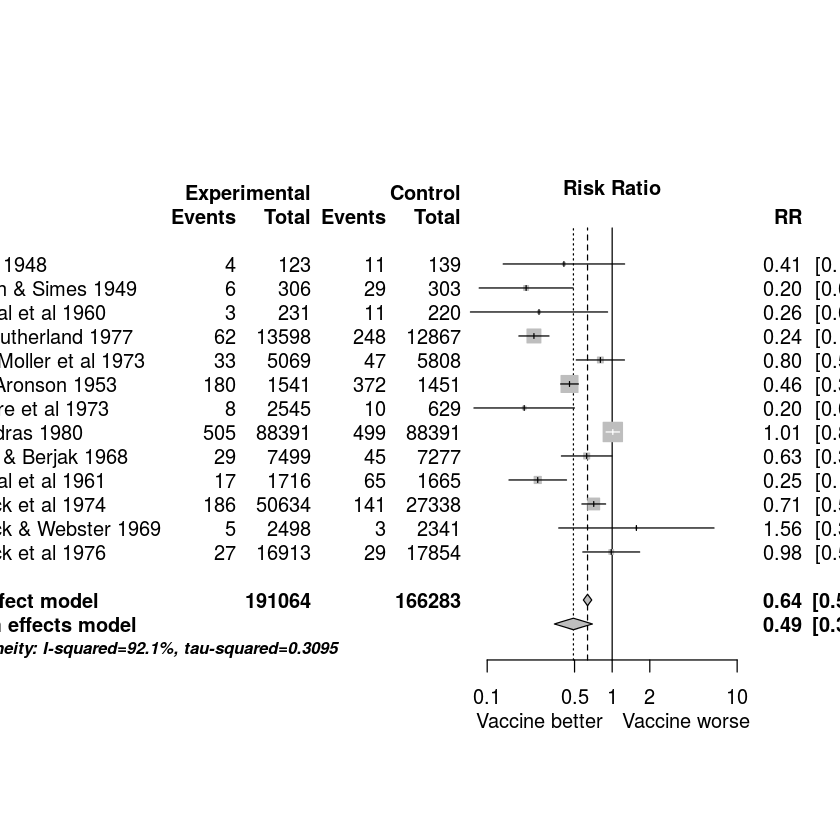

In [31]:
forest(meta2, rightcols=c('effect', 'ci'), print.pval.Q=FALSE,
       label.left='Vaccine better', label.right='Vaccine worse')

我们可在森林图中对纬度进行排序，看其是否对效应值具有影响：

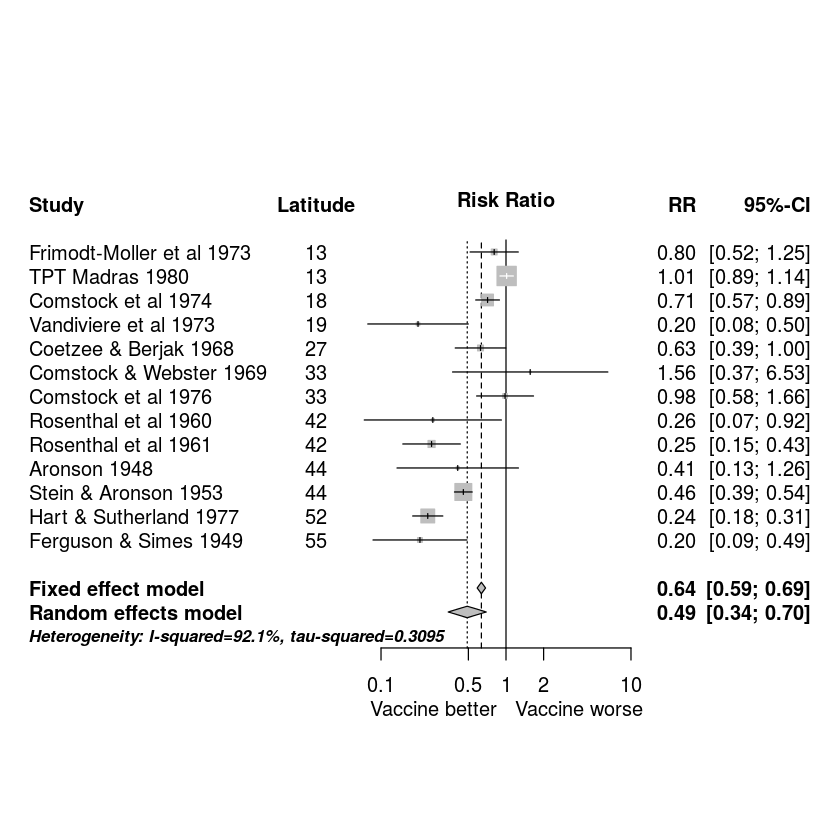

In [33]:
forest(meta2, sortvar=meta2$data$ablat, leftcols=c("studlab", "ablat"), leftlabs=c(NA, "Latitude"),
       rightcols=c("effect", "ci"), print.pval.Q=FALSE,
       label.left="Vaccine better", label.right="Vaccine worse")

这只是一种直观的观察，我们也可通过Meta回归进行分析：

In [34]:
mr2 <- metareg(meta2, ablat)

In [35]:
summary(mr2)


Mixed-Effects Model (k = 13; tau^2 estimator: DL)

  logLik  deviance       AIC       BIC      AICc  
 -7.8338   27.4536   21.6677   23.3625   24.3344  

tau^2 (estimated amount of residual heterogeneity):     0.0633 (SE = 0.0548)
tau (square root of estimated tau^2 value):             0.2516
I^2 (residual heterogeneity / unaccounted variability): 64.21%
H^2 (unaccounted variability / sampling variability):   2.79
R^2 (amount of heterogeneity accounted for):            79.50%

Test for Residual Heterogeneity: 
QE(df = 11) = 30.7331, p-val = 0.0012

Test of Moderators (coefficient(s) 2): 
QM(df = 1) = 18.8452, p-val < .0001

Model Results:

         estimate      se     zval    pval    ci.lb    ci.ub     
intrcpt    0.2595  0.2323   1.1172  0.2639  -0.1958   0.7149     
ablat     -0.0292  0.0067  -4.3411  <.0001  -0.0424  -0.0160  ***

---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1 


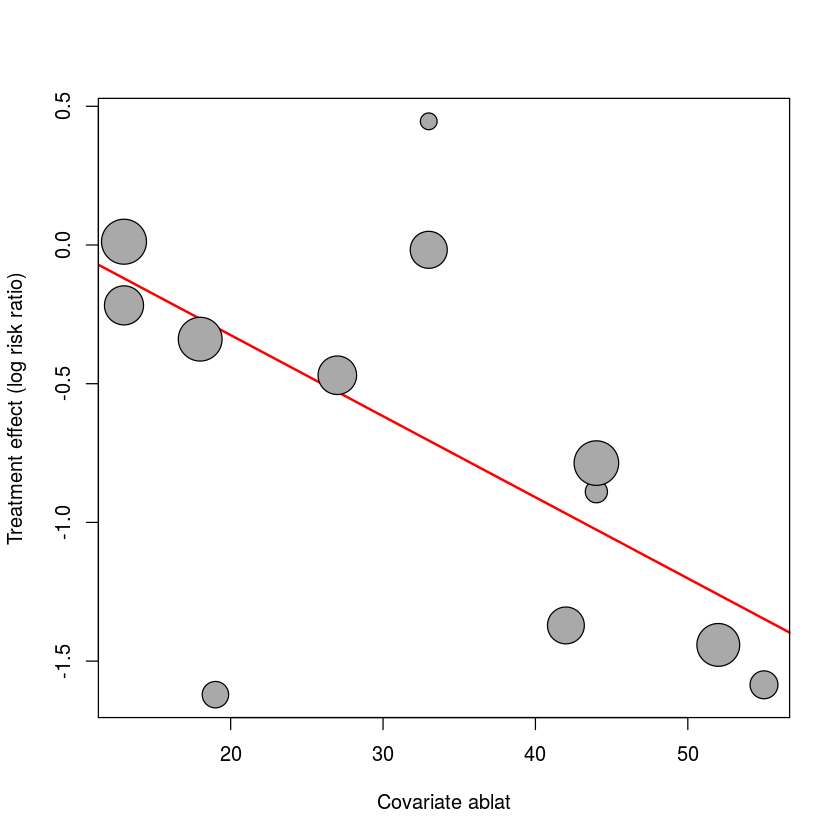

In [36]:
bubble(mr2, lwd=2, col.line="red")

In [37]:
?bubble

bubble {meta},R Documentation
x,An object of class metareg.
xlim,"The x limits (min,max) of the plot."
ylim,"The y limits (min,max) of the plot."
xlab,A label for the x-axis.
ylab,A label for the y-axis.
cex,The magnification to be used for plotting symbols.
min.cex,Minimal magnification for plotting symbols.
max.cex,Maximal magnification for plotting symbols.
pch,The plotting symbol used for individual studies.
col,A vector with colour of plotting symbols.


## 4. 本讲小结

- Meta回归分析必须应用于随机效应模型，而亚组分析可应用于两种模型；
- 当研究数少于5时，不能采用Meta回归；
- 协变量必须是预先定义的，而不能通过“数据挖掘（data dredging）”得到；
- 避免在Meta回归中使用过多的协变量（covariates）
- 必须正确理解回归系数$\beta$的实际意义，如果效应值是(log)OR，则回归系数也是OR值的(log)OR值；
- 协变量必须是研究水平上的变量，而不能是研究的平均值，也不能是如研究中女性研究对象的比例等等。

将异质性统计值$\mathbf{Q}$分解为$\mathbf{Q}_W$和$\mathbf{Q}_B$，能帮助我们确定可能的异质性。不论是亚组分析还是Meta回归，都能在某种程度上帮助我们确定异质性的来源，但其在应用时都必须特别注意用于分组的分类变量和回归中的协变量都必须是事前确定的，而不能是挖掘得到的。

如果存在明显的异质性，则采用随机效应模型肯定优于固定效应模型；即使异质性并不显著，采用随机效应模型与固定效应模型的结果比较相似，因此，尽可能在研究中采取随机效应模型。